<a href="https://colab.research.google.com/github/Jayand97/DSA-Assignment/blob/main/Jayand__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Dataset
data = pd.read_excel('/content/iris (2).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
data.isnull().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
# Fill categorical columns
data.fillna(data.mode().iloc[0], inplace=True)



In [ ]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
data["Classification"].value_counts()


Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
# Label Encoder Classification

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['target']= label_encoder.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,5.0,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,1.5,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
# Determine X and Y values

X=data.drop(columns="Classification",axis=1)
y=data["Classification"]

In [ ]:
# Split the dataset for Test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(120, 5) (30, 5) (120,) (30,)


In [ ]:
# Model Comaprison Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy',accuracy_score(y_test, y_pred))
y_pred

Accuracy 1.0


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
# Model Comparision using Standard Scalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)


(120, 5) (30, 5)


In [ ]:
# Evaluate Trained Models

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Confusion Matrix',confusion_matrix(y_test, y_pred))
print('Accuracy',accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred,average='micro'))
print('Recall',recall_score(y_test, y_pred,average='micro'))
print('F1 Score',f1_score(y_test, y_pred,average='micro'))


Confusion Matrix [[10  0  0]
 [ 1  8  0]
 [ 0  0 11]]
Accuracy 0.9666666666666667
Precision 0.9666666666666667
Recall 0.9666666666666667
F1 Score 0.9666666666666667


In [ ]:
# Model Comparison Using KNN Algorithum

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,10)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

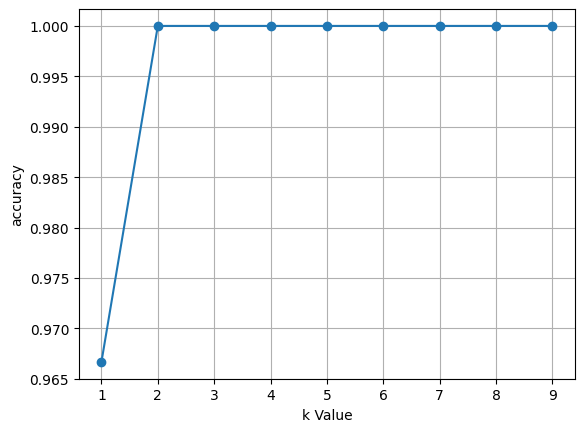

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
# Model Evaluation Using KNN

classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='micro'))


Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=1)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='macro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='macro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0


In [ ]:
# Model Evaluation Using SVC

from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)

y_svm_prediction = svm_clf.predict(X_test)
y_svm_prediction

print('CM',confusion_matrix(y_test, y_svm_prediction))
print('Accuraccy',accuracy_score(y_test, y_svm_prediction))
print('Pression',precision_score(y_test, y_svm_prediction,average='weighted'))
print("Recall",recall_score(y_test, y_svm_prediction,average='weighted'))
print("F1",f1_score(y_test, y_svm_prediction,average='weighted'))

CM [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuraccy 1.0
Pression 1.0
Recall 1.0
F1 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_clf = DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = ds_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
print("Accuracy",accuracy_score(y_test,y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print("Accuracy",accuracy_score(y_test,y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy 1.0


On the base of  model evaluation, an accuracy of 1.0 means that the model correctly predicted every instance during testing, which is considered perfect accuracy. However, an accuracy of 0.967 is also very high and indicates that the model correctly predicted approximately 96.7% of the instances.

It’s important to note that while an accuracy of 1.0 may seem ideal, it could also be a sign of overfitting, especially if the result is on a training set. Overfitting occurs when a model learns the training data too well, including noise and outliers, and may not perform as well on unseen data.

Therefore, the best accuracy depends on the context like precision, recall, F1-score, and confusion matrices to get a more comprehensive understanding of the model’s performance.

Therefore we can say that K Nearest Neighbour gives the best result
